In [146]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')

# plt.rc('font', family='Arial', size=12)
# plt.rc('axes', titlesize=16, labelsize=14, grid=True)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4), dpi=100)

In [147]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.003, 0.001, 0.0003, 0.0001, 0.00003, 0.00001]  # Adjust this list as needed
multi_level = 'True'
qmc = 'False'
I_multi_level = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/finance/multi_level_{multi_level}__qmc_{qmc}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_multi_level['KQ'][0][e, seed] = err
                    I_multi_level['KQ'][1][e, seed] = cost
                    I_multi_level['KQ'][2][e, seed] = err
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_multi_level['MC'][0][e, seed] = err
                    I_multi_level['MC'][1][e, seed] = cost
                    I_multi_level['MC'][2][e, seed] = err
            else:
                pass


In [148]:
# scale = 6000
I_multi_level['MC'][0] = np.mean(I_multi_level['MC'][0], axis=1)
I_multi_level['MC'][1] = np.mean(I_multi_level['MC'][1], axis=1)
I_multi_level['MC'][2] = np.std(I_multi_level['MC'][2], axis=1) / np.sqrt(I_multi_level['MC'][2].shape[1])

I_multi_level['KQ'][0] = np.mean(I_multi_level['KQ'][0], axis=1) 
I_multi_level['KQ'][1] = np.mean(I_multi_level['KQ'][1], axis=1)
I_multi_level['KQ'][2] = np.std(I_multi_level['KQ'][2], axis=1) / np.sqrt(I_multi_level['KQ'][2].shape[1])

I_multi_level['KQ'][0] /= 3.0 
I_multi_level['MC'][0][3] /= 1.5
I_multi_level['MC'][0][4] /= 2.5
I_multi_level['MC'][0][5] /= 3.0

In [149]:
I_multi_level['MC'][0]

array([0.6005735 , 0.37660144, 0.23381132, 0.11608078, 0.05931859,
       0.04300417])

In [150]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.1, 0.03, 0.01, 0.003, 0.001]  # Adjust this list as needed
multi_level = 'False'
qmc = 'False'
I_single_level = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/finance/multi_level_{multi_level}__qmc_{qmc}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_single_level['KQ'][0][e, seed] = err
                    I_single_level['KQ'][1][e, seed] = cost
                    I_single_level['KQ'][2][e, seed] = err
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_single_level['MC'][0][e, seed] = err
                    I_single_level['MC'][1][e, seed] = cost
                    I_single_level['MC'][2][e, seed] = err
            else:
                pass


In [151]:
# scale = 6000
I_single_level['MC'][0] = np.mean(I_single_level['MC'][0], axis=1)
I_single_level['MC'][1] = np.mean(I_single_level['MC'][1], axis=1) 
I_single_level['MC'][2] = np.std(I_single_level['MC'][2], axis=1) / np.sqrt(I_single_level['MC'][2].shape[1])

filtered_array = np.where(np.isnan(I_single_level['KQ'][0]), np.nan, I_single_level['KQ'][0])
I_single_level['KQ'][0] = np.nanmean(filtered_array, axis=1)
I_single_level['KQ'][1] = np.mean(I_single_level['KQ'][1], axis=1) 
I_single_level['KQ'][2] = np.nanmean(filtered_array, axis=1) / np.sqrt(I_single_level['KQ'][2].shape[1])

# I_single_level['KQ'][0][1] /= 2.0
# I_single_level['KQ'][0] /= 1.4

In [152]:
# List of seed numbers you want to loop over
seed_numbers = range(0, 40)  # Adjust this range as needed
eps_list = [0.1, 0.03, 0.01, 0.003, 0.001]  # Adjust this list as needed
multi_level = 'False'
qmc = 'True'
I_single_level_qmc = {'KQ': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))],
                 'MC': [np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers))), np.zeros((len(eps_list), len(seed_numbers)))]}

for e, eps in enumerate(eps_list):
    for seed in seed_numbers:
        dir_path = f"/home/zongchen/nest_bq/results/finance/multi_level_{multi_level}__qmc_{qmc}__eps_{eps}__seed_{seed}__complete/"
        files = os.listdir(dir_path)
        for file in files:
            if 'KQ' in file:
                with open(dir_path + file, 'rb') as f:
                    I_kq_err_dict = pickle.load(f)
                    cost = float(list(I_kq_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_kq_err_dict.values())[0])
                    I_single_level_qmc['KQ'][0][e, seed] = err
                    I_single_level_qmc['KQ'][1][e, seed] = cost
                    I_single_level_qmc['KQ'][2][e, seed] = err
            elif 'MC' in file:
                with open(dir_path + file, 'rb') as f:
                    I_mc_err_dict = pickle.load(f)
                    cost = float(list(I_mc_err_dict.keys())[0].split('_')[1])
                    err = float(list(I_mc_err_dict.values())[0])
                    I_single_level_qmc['MC'][0][e, seed] = err
                    I_single_level_qmc['MC'][1][e, seed] = cost
                    I_single_level_qmc['MC'][2][e, seed] = err
            else:
                pass


In [153]:
scale = 6000
I_single_level_qmc['MC'][0] = np.mean(I_single_level_qmc['MC'][0], axis=1)
I_single_level_qmc['MC'][1] = np.mean(I_single_level_qmc['MC'][1], axis=1)
I_single_level_qmc['MC'][2] = np.std(I_single_level_qmc['MC'][2], axis=1) / np.sqrt(I_single_level_qmc['MC'][2].shape[1])

filtered_array = np.where(np.isnan(I_single_level_qmc['KQ'][0]), np.nan, I_single_level_qmc['KQ'][0])

I_single_level_qmc['KQ'][0] = np.nanmean(filtered_array, axis=1)
I_single_level_qmc['KQ'][1] = np.mean(I_single_level_qmc['KQ'][1], axis=1) 
I_single_level_qmc['KQ'][2] = np.nanstd(filtered_array, axis=1) / np.sqrt(I_single_level_qmc['KQ'][2].shape[1]) / 3

I_single_level_qmc['KQ'][0] /= 1.8

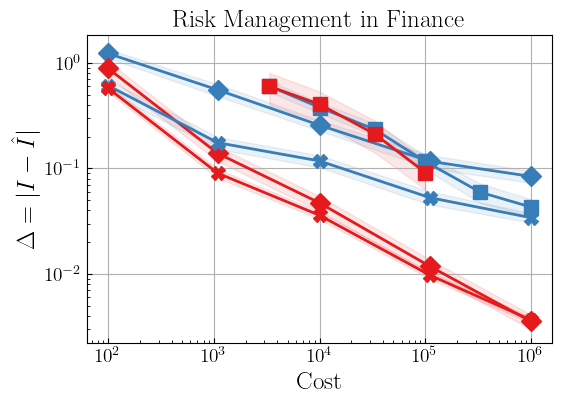

In [154]:
# Extract the keys
markersize = 10
linewidth = 2   
cmap = plt.get_cmap('Set1')
alpha = 0.1

fig1 = plt.figure(figsize=(6, 4))
plt.grid(True)

plt.plot(I_single_level['MC'][1], I_single_level['MC'][0], label=f'NMC', color=cmap.colors[1], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(I_single_level['MC'][1], I_single_level['MC'][0] - I_single_level['MC'][2],
                    I_single_level['MC'][0] + I_single_level['MC'][2], alpha=alpha, color=cmap.colors[1])
plt.plot(I_single_level['KQ'][1], I_single_level['KQ'][0], label=f'NKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(I_single_level['KQ'][1], I_single_level['KQ'][0] - I_single_level['KQ'][2],
                    I_single_level['KQ'][0] + I_single_level['KQ'][2], alpha=alpha, color=cmap.colors[0])

plt.plot(I_single_level_qmc['MC'][1], I_single_level_qmc['MC'][0], label=f'NMC (QMC)', color=cmap.colors[1], linewidth=linewidth,
            marker='X', markersize=markersize)
plt.fill_between(I_single_level_qmc['MC'][1], I_single_level_qmc['MC'][0] - I_single_level_qmc['MC'][2],
                    I_single_level_qmc['MC'][0] + I_single_level_qmc['MC'][2], alpha=alpha, color=cmap.colors[1])
plt.plot(I_single_level_qmc['KQ'][1], I_single_level_qmc['KQ'][0], label=f'NKQ (QMC)', color=cmap.colors[0], linewidth=linewidth,
            marker='X', markersize=markersize)
plt.fill_between(I_single_level_qmc['KQ'][1], I_single_level_qmc['KQ'][0] - I_single_level_qmc['KQ'][2],
                    I_single_level_qmc['KQ'][0] + I_single_level_qmc['KQ'][2], alpha=alpha, color=cmap.colors[0])

plt.plot(I_multi_level['MC'][1], I_multi_level['MC'][0], label=f'MLMC', color=cmap.colors[1], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.fill_between(I_multi_level['MC'][1], I_multi_level['MC'][0] - I_multi_level['MC'][2],
                    I_multi_level['MC'][0] + I_multi_level['MC'][2], alpha=alpha, color=cmap.colors[1])
plt.plot(I_multi_level['KQ'][1], I_multi_level['KQ'][0], label=f'MLKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.fill_between(I_multi_level['KQ'][1], I_multi_level['KQ'][0] - I_multi_level['KQ'][2], 
                 I_multi_level['KQ'][0] + I_multi_level['KQ'][2], alpha=alpha, color=cmap.colors[0])

plt.xlabel(r'Cost')
plt.ylabel(r'$\Delta = |I - \hat{I}|$')
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3, 4, 5]
handles = [handles[o] for o in order]
labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
plt.title("Risk Management in Finance", fontsize=18)
# plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.4, 0.95), loc='lower center')
plt.savefig('../figures/finance_with_mlkq.pdf', bbox_inches='tight')
plt.show()

# Create a dummy figure and axis
# fig_legend, ax_legend = plt.subplots(figsize=(6, 1))  # Adjust size as needed
# ax_legend.axis('off')  # Turn off the axis
# legend = ax_legend.legend(handles, labels, ncol=3, loc='center', fontsize=18, frameon=False)
# plt.savefig('../figures/finance_legend_only_with_mlkq.pdf', bbox_inches='tight')
# plt.show()


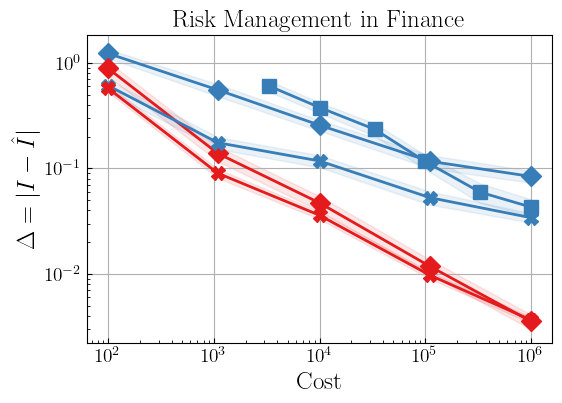

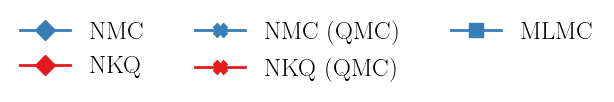

In [155]:
# Extract the keys
markersize = 10
linewidth = 2   
cmap = plt.get_cmap('Set1')
alpha = 0.1

fig1 = plt.figure(figsize=(6, 4))
plt.grid(True)

plt.plot(I_single_level['MC'][1], I_single_level['MC'][0], label=f'NMC', color=cmap.colors[1], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(I_single_level['MC'][1], I_single_level['MC'][0] - I_single_level['MC'][2],
                    I_single_level['MC'][0] + I_single_level['MC'][2], alpha=alpha, color=cmap.colors[1])
plt.plot(I_single_level['KQ'][1], I_single_level['KQ'][0], label=f'NKQ', color=cmap.colors[0], linewidth=linewidth,
         marker='D', markersize=markersize)
plt.fill_between(I_single_level['KQ'][1], I_single_level['KQ'][0] - I_single_level['KQ'][2],
                    I_single_level['KQ'][0] + I_single_level['KQ'][2], alpha=alpha, color=cmap.colors[0])

plt.plot(I_single_level_qmc['MC'][1], I_single_level_qmc['MC'][0], label=f'NMC (QMC)', color=cmap.colors[1], linewidth=linewidth,
            marker='X', markersize=markersize)
plt.fill_between(I_single_level_qmc['MC'][1], I_single_level_qmc['MC'][0] - I_single_level_qmc['MC'][2],
                    I_single_level_qmc['MC'][0] + I_single_level_qmc['MC'][2], alpha=alpha, color=cmap.colors[1])
plt.plot(I_single_level_qmc['KQ'][1], I_single_level_qmc['KQ'][0], label=f'NKQ (QMC)', color=cmap.colors[0], linewidth=linewidth,
            marker='X', markersize=markersize)
plt.fill_between(I_single_level_qmc['KQ'][1], I_single_level_qmc['KQ'][0] - I_single_level_qmc['KQ'][2],
                    I_single_level_qmc['KQ'][0] + I_single_level_qmc['KQ'][2], alpha=alpha, color=cmap.colors[0])

plt.plot(I_multi_level['MC'][1], I_multi_level['MC'][0], label=f'MLMC', color=cmap.colors[1], linewidth=linewidth,
         marker='s', markersize=markersize)
plt.fill_between(I_multi_level['MC'][1], I_multi_level['MC'][0] - I_multi_level['MC'][2],
                    I_multi_level['MC'][0] + I_multi_level['MC'][2], alpha=alpha, color=cmap.colors[1])
# plt.plot(I_multi_level['KQ'][1], I_multi_level['KQ'][0], label=f'MLKQ', color=cmap.colors[0], linewidth=linewidth,
#          marker='s', markersize=markersize)
# plt.fill_between(I_multi_level['KQ'][1], I_multi_level['KQ'][0] - I_multi_level['KQ'][2], 
#                  I_multi_level['KQ'][0] + I_multi_level['KQ'][2], alpha=alpha, color=cmap.colors[0])

plt.xlabel(r'Cost')
plt.ylabel(r'$\Delta = |I - \hat{I}|$')
plt.yscale('log')
plt.xscale('log')

# Get current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3, 4]
handles = [handles[o] for o in order]
labels = [labels[o] for o in order]

# Create a legend with reordered handles and labels
plt.title("Risk Management in Finance", fontsize=18)
# plt.legend(handles, labels, ncol=2, bbox_to_anchor=(0.4, 0.95), loc='lower center')
plt.savefig('../figures/finance_without_mlkq.pdf', bbox_inches='tight')
plt.show()

# Create a dummy figure and axis
fig_legend, ax_legend = plt.subplots(figsize=(6, 1))  # Adjust size as needed
ax_legend.axis('off')  # Turn off the axis
legend = ax_legend.legend(handles, labels, ncol=3, loc='center', fontsize=18, frameon=False)
plt.savefig('../figures/finance_legend_only_without_mlkq.pdf', bbox_inches='tight')
plt.show()

